# FIT5145 Assessment 2
#### Student Name: Linus McManamey
#### Student ID:  27236463

Date: 05/02/2017

Version: 1.0

Environment: Python 2.7.11 and Jupyter notebook

In [7]:
import geocoder
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### PLOTLY LIBRARIES

In [53]:
import plotly
plotly.tools.set_credentials_file(username='linus.austen.mcmanamey', api_key='3tqgEzyZAGTIeFY5sQ1T')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.graph_objs import Surface, Layout, Scene
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
init_notebook_mode(connected=True)
import plotly.tools as tls
#import colorlover as cl

In [9]:
### CONSTANTS
SPEED = 1200
EASER = 'linear'

In [10]:
#! conda install --channel https://conda.anaconda.org/conda-forge plotly=1.13.0

In [11]:
#! pip install cufflinks --upgrade

In [12]:
#!pip install geocoder

# Part A: Motion Chart

## Task 1

#### List all csv files in directory

In [13]:
!ls *.csv

'ls' is not recognized as an internal or external command,
operable program or batch file.


#### List all excel files in directory

In [14]:
!ls *.xls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
SA4 = pd.read_excel('SA4 Time Series - October 2016.xls', sheetname = 'Time Series') # we will have to specify the sheet name
SA4.head(5)

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,n/a,6.773762,60.735313
1,NSW,1978-03-01,n/a,6.490161,59.851078
2,NSW,1978-04-01,63.7195,6.507978,60.168513
3,NSW,1978-05-01,63.682,6.115171,60.003564
4,NSW,1978-06-01,63.6829,6.424127,60.145380


#### Rename columns

In [16]:
SA4 = SA4.rename(columns={'State/Territory':'State'})
SA4 = SA4.rename(columns={'Employment Rate (15-64)':'E_Rate'})
SA4 = SA4.rename(columns={'Unemployment Rate (15+)':'U_Rate'})
SA4 = SA4.rename(columns={'Participation Rate (15+)':'P_Rate'})
SA4.head(2)

,State,Date,E_Rate,U_Rate,P_Rate
0,NSW,1978-02-01,n/a,6.773762,60.735313
1,NSW,1978-03-01,n/a,6.490161,59.851078


In [17]:
print("check for number of n/a's  in E_Rate")
len(SA4[SA4.E_Rate  == 'n/a'])

check for number of n/a's  in E_Rate


16

#### Remove 'n/a' and cast as float

In [18]:
SA4 = SA4[SA4.E_Rate  != 'n/a']
SA4.E_Rate = SA4.E_Rate.astype('float')
print(len(SA4))

3704


#### Check  dataframe types

In [19]:
SA4.dtypes

State             object
Date      datetime64[ns]
E_Rate           float64
U_Rate           float64
P_Rate           float64
dtype: object

#### Check for null values

In [20]:
SA4.U_Rate.isnull().sum()
SA4.P_Rate.isnull().sum()
SA4.E_Rate.isnull().sum()

0

0

0

#### Set Date as index and then remove "Date" column

In [21]:
SA4.index = pd.to_datetime(SA4.Date)
SA4 = SA4.drop('Date', axis=1)
SA4.head(2)

,State,E_Rate,U_Rate,P_Rate
Date,,,,
1978-04-01,NSW,63.719468,6.507978,60.168513
1978-05-01,NSW,63.682010,6.115171,60.003564


#### Import csv files to pandas data frame

In [22]:
ERP = pd.read_csv('ERP_by state and gender.csv',infer_datetime_format=True,parse_dates=True, index_col=0)
jobVacDF = pd.read_csv('Job Vacancies.csv',header=0,index_col=0, infer_datetime_format=True, parse_dates=True)

In [23]:
jobVacDF.head(2)

,2006-01-01,2006-02-01,2006-03-01,2006-04-01,2006-05-01,2006-06-01,2006-07-01,2006-08-01,2006-09-01,2006-10-01,...,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01
State,,,,,,,,,,,,,,,,,,,,,
NSW,73047.8,73995.0,75246.3,76539.8,75614.9,81637.1,77047.4,78148.5,76411.3,82945.5,...,65297.0,64206.1,63909.2,65951.1,66060.8,66225.8,65063.3,65154.9,63121.4,63534.1
VIC,49399.3,51027.9,51492.4,51473.1,50570.0,53746.2,52149.5,52783.5,51013.6,56556.5,...,42227.9,41179.8,40338.7,42380.6,42968.9,42947.6,42292.8,42511.9,40092.0,42182.9


#### Transpose dataframe

In [24]:
jobVacDF = jobVacDF.T

In [25]:
jobVacDF.head(5)

State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-01-01,73047.8,49399.3,49807.5,13111.4,18087.6,2895.0,2563.0,3165.3
2006-02-01,73995.0,51027.9,49526.3,13160.9,18943.3,2874.7,2402.0,3335.5
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-04-01,76539.8,51473.1,50440.4,13308.7,19854.2,2833.2,2590.6,3493.0
2006-05-01,75614.9,50570.0,51387.3,13095.8,20351.9,2747.1,2805.4,3666.7


#### Convert index column to datetime value

In [26]:
jobVacDF.index = pd.to_datetime(jobVacDF.index)

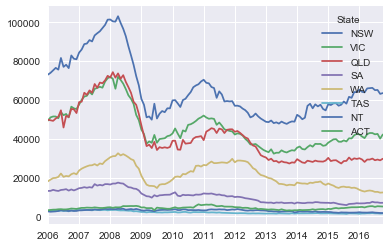

In [27]:
jobVacDF['2006-01-01':'2016-10-01'].plot()

## Plot  -  Number of Job Vacancies per year by State

In [28]:
data = []
for (name, series) in jobVacDF.iteritems():
            data.append(dict(type='scatter', mode='lines',x=jobVacDF.index, y=jobVacDF[name], name=jobVacDF[name].name))

layout = dict(title='Number of Job Vacancies per year by State',showlegend=True)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'Number_of_Job_Vacancies_per_year_by_State')

#### Rename  Estimated Resident Population dataframe columns

In [29]:
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  New South Wales ;':'NSW_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Victoria ;':'VIC_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Queensland ;':'QLD_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  South Australia ;':'SA_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Western Australia ;':'WA_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Tasmania ;':'TAS_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Northern Territory ;':'NT_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Australian Capital Territory ;':'ACT_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Australia ;':'AUST_Male'})

ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  New South Wales ;':'NSW_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Victoria ;':'VIC_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Queensland ;':'QLD_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  South Australia ;':'SA_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Western Australia ;':'WA_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Tasmania ;':'TAS_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Northern Territory ;':'NT_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Australian Capital Territory ;':'ACT_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Australia ;':'AUST_Female'})


ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  New South Wales ;':'NSW_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Victoria ;':'VIC_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Queensland ;':'QLD_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  South Australia ;':'SA_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Western Australia ;':'WA_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Tasmania ;':'TAS_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Northern Territory ;':'NT_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;':'ACT_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Australia ;':'TOTAL'})

#### Convert index column to datetime value

In [30]:
ERP.index = pd.to_datetime(ERP.index)

In [31]:
ERP.head(2)

,NSW_Male,VIC_Male,QLD_Male,SA_Male,WA_Male,TAS_Male,NT_Male,ACT_Male,AUST_Male,NSW_Female,...,AUST_Female,NSW_Persons,VIC_Persons,QLD_Persons,SA_Persons,WA_Persons,TAS_Persons,NT_Persons,ACT_Persons,TOTAL
2005-12-01,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,3390562,...,10224161,6718023,5023203,3964175,1544852,2029936,488098,207385,333505,20311543
2006-03-01,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,3399523,...,10265150,6735528,5048207,3987653,1550135,2042450,489140,208347,334299,20398132


#### Break down dataframes in to population totals by state

In [32]:
maleDF = ERP[[col for col in ERP.columns if "Male" in col]]
femaleDF = ERP[[col for col in ERP.columns if "Female" in col]]
personDF = ERP[[col for col in ERP.columns if "Persons" in col]]

#### Rename to population totals by state

In [33]:
personDF = personDF.rename(columns={'NSW_Persons':'NSW'})
personDF = personDF.rename(columns={'VIC_Persons':'VIC'})
personDF = personDF.rename(columns={'QLD_Persons':'QLD'})
personDF = personDF.rename(columns={'SA_Persons':'SA'})
personDF = personDF.rename(columns={'WA_Persons':'WA'})
personDF = personDF.rename(columns={'TAS_Persons':'TAS'})
personDF = personDF.rename(columns={'NT_Persons':'NT'})
personDF = personDF.rename(columns={'ACT_Persons':'ACT'})

In [34]:
populationDF = personDF.copy()

## Initial plot to check populationDF working

In [35]:
data = []
for (name, series) in populationDF.iteritems():
            data.append(dict(type='scatter', mode='lines',x=populationDF.index, y=populationDF[name], name=populationDF[name].name))


layout = dict(title='Population States of Australia',showlegend=True)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'Population_States_of_Australia')

#### Retrive list of dates from index of population dataframe and subset other dataframes for the same dates

In [36]:
baseDates = populationDF.index.tolist()
jobVacDF = jobVacDF.ix[baseDates]
SA4 = SA4.ix[baseDates]

In [37]:
jobVacDF.head(2)
populationDF.head(2)
SA4.head(2)

State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2005-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9


,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505
2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299


,State,E_Rate,U_Rate,P_Rate
Date,,,,
2005-12-01,NSW,70.481740,5.293757,63.106123
2005-12-01,VIC,71.806591,5.260037,64.045364


#### Drop All NAN rows

In [38]:
populationDF = populationDF.dropna(how='any')
jobVacDF = jobVacDF.dropna(how='any')

#### chage structure of dataframe to match other two
* Extract the unemployment rate

In [39]:
print("Before_____________")
SA4.head(2)
unemploymentDF = SA4.pivot(columns='State', values='U_Rate')
del unemploymentDF.index.name
print("After_____________")
unemploymentDF.head(2)

Before_____________


,State,E_Rate,U_Rate,P_Rate
Date,,,,
2005-12-01,NSW,70.481740,5.293757,63.106123
2005-12-01,VIC,71.806591,5.260037,64.045364


After_____________


State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
2005-12-01,3.422536,5.293757,6.004577,4.863610,4.868181,5.962563,5.260037,4.326411
2006-03-01,3.254369,4.978780,5.765331,4.705125,5.035000,6.608448,5.112932,3.988064


#### Check structure an print 

In [40]:
print(len(jobVacDF))
jobVacDF.head(2)
print(len(populationDF))
populationDF.head(2)
print(len(unemploymentDF))
unemploymentDF.head(2)

38


State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-06-01,81637.1,53746.2,54667.4,13611.8,22077.5,2978.1,3201.0,3719.0


39


,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505
2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299


39


State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
2005-12-01,3.422536,5.293757,6.004577,4.863610,4.868181,5.962563,5.260037,4.326411
2006-03-01,3.254369,4.978780,5.765331,4.705125,5.035000,6.608448,5.112932,3.988064


#### Drop first row so dates indexes are the same for each dataframe

In [41]:
unemploymentDF = unemploymentDF.drop(unemploymentDF.index[[0]])
populationDF = populationDF.drop(populationDF.index[[0]])

In [42]:
print(len(jobVacDF))
jobVacDF.head(2)
print(len(populationDF))
populationDF.head(2)
print(len(unemploymentDF))
unemploymentDF.head(2)

38


State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-06-01,81637.1,53746.2,54667.4,13611.8,22077.5,2978.1,3201.0,3719.0


38


,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299
2006-06-01,6742690,5061266,4007992,1552529,2050581,489302,209057,335170


38


State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
2006-03-01,3.254369,4.978780,5.765331,4.705125,5.035000,6.608448,5.112932,3.988064
2006-06-01,3.004263,5.288439,4.942226,4.500243,4.730513,6.669892,5.021526,3.351213


In [43]:
dataset = pd.DataFrame() 
dataset['unemployment'] = unemploymentDF.unstack()
dataset['population'] = populationDF.unstack()
dataset['jobVacancies'] = jobVacDF.unstack()

In [44]:
dataset.reset_index(level=0, inplace=True)

### Plot table of dataframe

In [45]:
table = FF.create_table(dataset.head(10))
py.iplot(table)

C:\Users\linus\Anaconda2\lib\site-packages\plotly\tools.py:1422: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



# Generate a Motion chart
* number of job vacancies on the x-axis, 
* unemployment rate on the y-axis, 
* the colour the bubbles is given by the state and the size of the bubbles is given by the population of the state.

In [46]:
years = dataset.index.unique()
years = years.strftime('%Y-%m-%d')
years = sorted(years)
states = dataset.State.unique()
states = sorted(states)
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [ dataset.jobVacancies.min(), dataset.jobVacancies.max()],'title': 'Job Vacancies'}
figure['layout']['yaxis'] = {'range': [ dataset.unemployment.min(), dataset.unemployment.max()],'title': 'unemployment', 'type':'linear'}
figure['layout']['hovermode'] = 'closest'
#figure['layout']['autosize'] = False
figure['layout']['Margin']  = {'l':50, 'r': 50, 'b': 100, 't': 100, 'pad':4}

In [47]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': SPEED, 'redraw': False},'fromcurrent': False, 
                                'transition': {'duration': SPEED, 'easing': EASER}}],
                'label': 'Play','method': 'animate'},
            {
                'args': [[None], {'frame': {'duration': SPEED, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': SPEED}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 10},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

In [48]:
    
sliders_dict = {
    'active': 1,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year: ',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': SPEED, 'easing': EASER},
    'pad': {'b': 1, 't': 1},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [49]:
figure['layout']['slider'] = {
    'args': [
        'slider.value', {
            'duration': SPEED,
            'ease': EASER
        }
    ],
    'initialValue': years[0],
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}

In [50]:

for state in states:
    dataset_by_state = dataset[dataset['State'] == state]
    figure['data'].append(dict(text=state,
                               hoverinfo ="all", 
                               type='scatter', 
                               x=dataset_by_state['jobVacancies'], 
                               y=dataset_by_state['unemployment'],
                               name=state,mode='markers',
                               marker=dict(symbol='circle', 
                                           size=dataset_by_state['population']/10000,
                                           sizeref=2, 
                                           sizemode='radius')))

In [51]:
year = years[0]
for year in years:
    frame = {'data': [], 'name': str(year)}
    for state in states:
        dataset_by_state = dataset[dataset.index == year]
        dataset_by_state = dataset_by_state[dataset_by_state['State'] == state]
        frame['data'].append(dict(text=state,
                                  hoverinfo ="all",
                                  type='scatter',
                                  x=dataset_by_state['jobVacancies'], 
                                  y=dataset_by_state['unemployment'],
                                  name=state,mode='markers',
                                  marker=dict(symbol='circle', 
                                              size=dataset_by_state['population']/10000 ,
                                              sizeref=2, 
                                              sizemode='radius')))
    
    figure['frames'].append(frame)
    slider_step = {'args': [[year],{'frame': {'duration': SPEED, 'redraw': False},
         'mode': 'immediate','transition': {'duration': SPEED,  'easing': EASER}}],'label': year,'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]
iplot(figure)

PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

'Margin' is not allowed in 'layout'

Path To Error: ['layout']['Margin']

Valid attributes for 'layout' at path ['layout'] under parents ['figure']:

    ['angularaxis', 'annotations', 'autosize', 'bargap', 'bargroupgap',
    'barmode', 'barnorm', 'boxgap', 'boxgroupgap', 'boxmode', 'calendar',
    'direction', 'dragmode', 'font', 'geo', 'height', 'hiddenlabels',
    'hiddenlabelssrc', 'hidesources', 'hovermode', 'images', 'legend',
    'mapbox', 'margin', 'orientation', 'paper_bgcolor', 'plot_bgcolor',
    'radialaxis', 'scene', 'separators', 'shapes', 'showlegend', 'sliders',
    'smith', 'ternary', 'title', 'titlefont', 'updatemenus', 'width',
    'xaxis', 'yaxis']

Run `<layout-object>.help('attribute')` on any of the above.
'<layout-object>' is the object at ['layout']

<H1>Questions - Task 1</H1>
<body>
<h3><p style="color:red;">What are the overall patterns across different states in Australia?</p></h3>
</body>
    
Over the period of 2006 to 2015:
the Larger states (NSW, QLD, VIC and WA) have more job opportunites and lower unemploymet, the smaller population states sucjh as TAS, NT and the Act have higher unemployment and less job oporunities.
between 2006 – 2009 across all the states there is generally low unemploymnet, 2014 sees an over contraction in the number of jobs across the spectrum
<body>
<h3><p style="color:red;">Which state has high unemployment rate and low number of vacancies (you may point out different period of time)?</p></h3>
</body>

Tasmania

<body><h3><p style="color:red;">which state has the low unemployment rate but with a lot of vacancies? Any idea about why?</p></h3>
</body>

New South Wales.




<h1>Part 2</h1>

Twitter data from the various Australian Government departments was used for this task. 

APS Twitter Leaderboard

https://www.data.gov.au/dataset/aps-twitter-leaderboard


#### List all files in the dataFile directory

In [ ]:
!ls dataFiles/*.csv

#### The top sixteen government departments (most followers) from the most recent file were used 

In [ ]:
top16 = pd.read_csv('dataFiles/twitterfollowers-2016-01-05.csv')
top16 = top16.nlargest(16, 'End of Month Followers')
top16_list = top16['Display Name'].tolist()

#### Read in all csv files from directory

In [ ]:
files = !ls dataFiles/*.csv
df = concat([read_csv(f) for f in files])

### keep the top Sixteen government departments

In [ ]:
df.dtypes

In [ ]:
df = df[df['Display Name'].isin(top16_list)]
df.head()

### Create dummy variable to allow conversion to datetime

In [ ]:
df['day'] = 01                           
df['date'] = pd.to_datetime(df[['Year', 'Month', 'day']],format='%Y-%m-%d')

### Set date to index

In [ ]:
df = df.set_index(df["date"])

### Drop un-needed columns

In [ ]:
df = df.drop('Verified', axis=1)
df = df.drop('date', axis=1)
df = df.drop('Others Retweeted', axis=1)
df = df.drop('Times Other User Mentioned', axis=1)
df = df.drop('day', axis=1)
df = df.drop('Month', axis=1)
df = df.drop('Year', axis=1)

### Rename Columns

In [ ]:
df = df.rename(columns={'End of Month Followers':'Followers'})
df = df.rename(columns={'Total Times Retweeted':'Retweeted'})
df = df.rename(columns={'Total Times Favourited':'Favourited'})
df = df.rename(columns={'Display Name':'Display_Name'})
df = df.rename(columns={'Twitter':'Twitter_Name'})
df.head()

# Generate Motion Plot

In [ ]:
dataset = df.copy()
years = dataset.index.unique()
years = years.strftime('%Y-%m-%d')
years = sorted(years)
Display_Names = dataset.Display_Name.unique()
Display_Names = sorted(Display_Names)
figure = {'data': [],'layout': {},'frames': [],'config': {'scrollzoom': True}}

# fill in most of layout
figure['layout']['title'] = "Australian Government departments Twitter data"
figure['layout']['xaxis'] = {'range': [ dataset.Tweets.min(), dataset.Tweets.max()],'title': 'Tweets'}
figure['layout']['yaxis'] = {'range': [ dataset.Retweeted.min(), dataset.Retweeted.max()],'title': 'Retweeted', 'type':'linear'}
figure['layout']['hovermode'] = 'closest'
#figure['layout']['autosize'] = False
figure['layout']['Margin']  = {'l':10, 'r': 5, 'b': 10, 't': 10, 'pad':1}

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': SPEED, 'redraw': False},'fromcurrent': True, 
                                'transition': {'duration': SPEED, 'easing': EASER}}],
                'label': 'Play',
                'method': 'animate'},
            {
                'args': [[None], {'frame': {'duration': SPEED, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'}
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 10},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

figure['layout']['slider'] = {
    'args': [
        'slider.value', {
            'duration': SPEED,
            'ease': EASER
        }
    ],
    'initialValue': years[0],
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}

sliders_dict = {
    'active': 1,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year: ',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': SPEED, 'easing': EASER},
    'pad': {'b': 1, 't': 1},
    'len': 0.9,
    'x': 0.1,
    'y':-0.05,
    'steps': []
}

for Display_Name in Display_Names:
    dataset_by_Display_Name = dataset[dataset['Display_Name'] == Display_Name]
    figure['data'].append(dict(text=dataset_by_Display_Name.Twitter_Name,
                               hoverinfo ="all", 
                               type='scatter', 
                               x=dataset_by_Display_Name['Tweets'], 
                               y=dataset_by_Display_Name['Retweeted'],
                               name=Display_Name,
                               mode='markers',
                               marker=dict(symbol='circle', 
                                           size=dataset_by_Display_Name['Followers']/1000,
                                           sizeref=0.75, 
                                           sizemode='radius')))

for year in years:
    frame = {'data': [], 'name': str(year)}
    for Display_Name in Display_Names:
        dataset_by_Display_Name = dataset[dataset.index == year]
        dataset_by_Display_Name = dataset_by_Display_Name[dataset_by_Display_Name['Display_Name'] == Display_Name]
        frame['data'].append(dict(text=dataset_by_Display_Name.Twitter_Name,
                                  hoverinfo ="all",
                                  type='scatter',
                                  x=dataset_by_Display_Name['Tweets'], 
                                  y=dataset_by_Display_Name['Retweeted'],
                                  name=Display_Name,
                                  mode='markers',
                                  marker=dict(symbol='circle', 
                                              size=dataset_by_Display_Name['Followers']/1000,
                                              sizeref=0.75, 
                                              sizemode='radius')))
    figure['frames'].append(frame)
    slider_step = {'args': [[year],{'frame': {'duration': SPEED, 'redraw': False},
         'mode': 'immediate','transition': {'duration': SPEED,  'easing': EASER}}],'label': year,'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]
iplot(figure)

<H1>Questions - Task 2</H1>
<body>
<h3><p style="color:red;">Interpret using a Motion Chart and communicate your findings.</p></h3>
</body>

* The @australia twitter account has the largest followers by far.
* It is Tourism Australia's official account. 
* It has steadliy increased its followers over the period.
* It gets the most retweets from its posts.
* The other departments are not getting the same return on their tweets as the @australia account does as the are all hovering in the bottom corner. 
* The other intersting account that has a rapid increase in followers is the @artsculturegov account.
* The @AusHumanRights (green bubble) account generates alot of outgoing information however it doesnt have any real impact as its information is not being passed on via retweets.


<h1>Part 3 </h1>
* Load the data into a Pandas dataframes

In [ ]:
#df = pd.read_csv('Rate.csv')

#### Create sample dataframe because 2GB makes my system crash

In [ ]:
#df = df.sample(frac=0.05, replace=True)
#df.to_csv('sampleRate.csv')

In [ ]:
df = pd.read_csv('sampleRate.csv')

## EDA
* its dimensions
* the attributes
* do some general statistics (e.g., using describe() function). Communicate your findings

In [ ]:
### attributes
df.info()

In [ ]:
df.head(5)

In [ ]:
### dimensions
print("shape: ", df.shape)
print ("number of rows: " ,len(df.index))
print ("number of cells: " ,df.size)

Extract the following columns from the data...

In [ ]:
columnNames = ['BusinessYear', 'StateCode', 'IssuerId' ,'PlanId', 'Age', 'IndividualRate', 'IndividualTobaccoRate']
df = df[columnNames]
df.info()

### Audit data column ‘IndividualRate’ 
* Do some statistics of the value range of ‘IndividualRate’. 
* Show the distribution of ‘IndividualRate’ values using boxplot and histogram. 
* Communicate your findings
* e.g., is there anything look suspicious to you? Are there any outliers? What do you think is a reasonable rate for individual plans? [Hint: you may have to adjust the limit of y axis to be able to see the plot.]

In [ ]:
df.IndividualRate.describe()

In [ ]:
bplot1 = plt.boxplot(df.IndividualRate)

 #### Show the distribution of ‘IndividualRate’ values using boxplot and histogram

In [ ]:
df =  df[df. IndividualRate < 9000]
df =  df[df. IndividualRate > 0]

In [ ]:
df.IndividualRate.min()
df.IndividualRate.max()

In [ ]:
temp = plt.hist(df.IndividualRate)

In [ ]:
df.IndividualRate.kurt()
df.IndividualRate.skew()

In [ ]:
df.IndividualRate.min()
df.IndividualRate.max()

# Task 3.2

Prepare the data for the later tasks, extract the rows where ‘IndividualRate’ is greater than 0 and less than 9000.

In [ ]:
StateCode_list = df.StateCode.unique()
StateCode_list = np.sort(StateCode_list)

In [ ]:
StateCode_Name = []
for i in StateCode_list:
        g = geocoder.google(i,components="administrative_area:%s|country:US" %(i))
        t = g.address.partition(",")  
        StateCode_Name.append(t[0].encode("utf-8"))

* compare the number of carries (i.e., issuers)
* total number pf plans

In [ ]:
print("Listed Carries: ",len(df.IssuerId.unique()))
print("Listed Plans: ",len(df.PlanId.unique()))
print("Listed States: ",len(df.StateCode.unique()))

## Number of Issuers by States of US 

In [ ]:
number_providers = df[['IssuerId','PlanId']].groupby(df['StateCode']).agg(['nunique'])
number_providers.columns = number_providers.columns.droplevel(1)

In [ ]:
layout = go.Layout(title='Number of Issuers by US State',yaxis=dict(title='Number of Issuers',titlefont=dict(family='Courier New, monospace',size=18,)))

data = [go.Bar(x=list(number_providers.index), y=list(number_providers.IssuerId))]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Number_of_Issuers_by_US_State')

## Number of Policies by States of US 

In [ ]:
layout = go.Layout(title='Number of Plans by US State',yaxis=dict(title='Number of Plans',titlefont=dict(family='Courier New, monospace',size=18,)))

data = [go.Bar(x=list(number_providers.index), y=list(number_providers.PlanId))]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Number_of_Plans_by_US_State')

In [ ]:
bubbleDF = pd.DataFrame()
bubbleDF['State'] = StateCode_Name
bubbleDF['numberIssuers'] = list(number_providers.IssuerId)
bubbleDF['numberPlanId'] = list(number_providers.PlanId)
bubbleDF.head()

# Import us census data for population estimates for 2014

In [ ]:
population = pd.read_csv('us_statedata.csv',thousands=",")
population.head()

In [ ]:
df2 = pd.merge(bubbleDF, population, on='State',how='inner')
df2.head(5)

In [ ]:
cf.set_config_file(theme='ggplot')

In [ ]:
df2.iplot(kind='bubble', x='numberIssuers', y='numberPlanId', size='Population', text='State',
             xTitle='numberof Issuers', yTitle='number of Plans',title= "Population of USA States 2014 - Issuers to Policies")

<H1>Questions - Task 3.2</H1>
<body>
<h3><p style="color:red;">Whether there are more plans for where there are larger populations?</p></h3>
</body>

THe above graph would indicatre that based on population there are more plociy issuers and plans the larger hte population

<body>
<h3><p style="color:red;">which state has the largest/least number of health insurance issuers or plans?</p></h3>
</body>

Texas would appear from this graph to have the largest number of health insurance issuers, however Wisconsin has per capaita the highest rate for both policies and plans.



<body>
<h3><p style="color:red;">whether there are more plans for where there are larger populations?</p></h3>
</body>

the above information would indicate that the above statement is true

# Task 3.3
* How many issuers offers plans to non-smokers vs. smokers across different states? 


### remove all NaN values from dataframe to create IndividualTobaccoRate dataframe

In [ ]:
tRate_DF = df.dropna()

### Group by state and do a unique count on number of issuers with smoking policies

In [ ]:
plans_smoking = tRate_DF[['IssuerId', 'PlanId']].groupby(tRate_DF['StateCode']).agg(['nunique'])
plans_smoking.columns = plans_smoking.columns.droplevel(1)

###  Graph of Policy issuers with smoking policies

In [ ]:
layout = go.Layout(barmode='group',title='Number of Issuers per State - Smoker -V- NonSmoker Plans', yaxis=dict(title='Number of Plans',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Bar(x=StateCode_Name, y=list(number_providers.IssuerId), name='Total Issuers')
dataX = go.Bar(x=StateCode_Name, y=list(plans_smoking.IssuerId), name='Issuers with Smoker only Plans')
data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Number_of_Issuers_per_State_Smoker_V_NonSmoker_Plans')

###  Graph of Plans with smoking policies

In [ ]:
layout = go.Layout(barmode='group',title='Number of Plans per State - Smoker -V- Non', yaxis=dict(title='Number of Plans',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Bar(x=StateCode_Name, y=list(number_providers.PlanId), name='Total Plans')
dataX = go.Bar(x=StateCode_Name, y=list(plans_smoking.PlanId), name='Smoking Plans')
data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Number_of_Plans_per_State_Smoker_V_Non')

### Do all states provided plans for tobacco users?

In [ ]:
no_tab_policy = df[['IndividualTobaccoRate']].groupby(df['StateCode']).agg(['nunique'])
no_tab_policy.columns = no_tab_policy.columns.droplevel(1)
no_tab_policy = no_tab_policy.loc[no_tab_policy['IndividualTobaccoRate'] < 1]
no_tab = list(no_tab_policy.index)
no_tab_name= []
for i in no_tab:
        g = geocoder.google(i,components="administrative_area:%s|country:US" %(i))
        t = g.address.partition(",")  
        no_tab_name.append(t[0].encode("utf-8"))
print "These States have No policies for Smokers: ", no_tab_name 

# Task 3.4

In [ ]:
mean_plan_price = df[['IndividualTobaccoRate', 'IndividualRate']].groupby(df['StateCode']).agg(['mean'])
mean_plan_price.columns = mean_plan_price.columns.droplevel(1)

In [ ]:
layout = go.Layout(barmode='group',title='Mean Price of Plans- Smoker -V- Non', yaxis=dict(title='Cost of Plans',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Bar(x=StateCode_Name, y=list(mean_plan_price.IndividualRate), name='Non Smoking Plans')
dataX = go.Bar(x=StateCode_Name, y=list(mean_plan_price.IndividualTobaccoRate), name='Smoking Plans')
data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Mean_Price_of_Plans_Smoker_V_Non')

# Task 3.5

In [ ]:
df.head()

In [ ]:
df = df.drop(df[df.Age == 'Family Option'].index)
df['Age'] = df['Age'].replace(['0-20'], '20')
df['Age'] = df['Age'].replace(['65 and over'], '65')
age_mean = df[['IndividualRate', 'IndividualTobaccoRate']].groupby(df['Age']).agg(['mean'])
age_mean.columns = age_mean.columns.droplevel(1)

In [ ]:
layout = go.Layout(barmode='group',title='Mean Policy Cost based on Age', xaxis=dict(title='Age',titlefont=dict(family='Courier New, monospace',size=18,)),yaxis=dict(title='Mean Cost of Plan',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=list(age_mean.index), y=list(age_mean.IndividualRate), 
                   name='Non Smoker', 
                   mode = 'lines+markers')
dataX = go.Scatter(x=list(age_mean.index), y=list(age_mean.IndividualTobaccoRate), 
                   mode = 'lines+markers',
                   name = 'Smoker')
data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Mean_Policy_Cost_based_on_Age')

<H1>Questions - Task 3.5</H1>
<body>
<h3><p style="color:red;">As a whole, compare the average rates/cost for non-smokers vs. smokers at different ages. how does the rates looks like as age of the subscriber increases?</p></h3>
</body>

As you can see from the above graph there is a definate increase for both smokers and non smokers on ayarage in the US. however ther is a definate increase in the rate of mean cost for smokers as they get older


In [ ]:
age_list = df.Age.unique()
age_list = np.sort(age_list)

### Generate Mean Price by Age and State

In [ ]:
df2 = df.copy()
df2.set_index(['StateCode', 'Age'], inplace=True)
df2 = df2.groupby(level=[0,1]).mean()
columnNames = ['IndividualRate', 'IndividualTobaccoRate']
df2 = df2[columnNames]
df2.head(5)

### Remove all Index's to reset State Code as the only index

In [ ]:
df2.reset_index(inplace=True)  
df2.head(5)

In [ ]:
columnNames = ['StateCode', 'Age','IndividualRate','IndividualTobaccoRate']
df2 = df2[columnNames]
df2 = df2.set_index(df2.StateCode)
df2.head(5)

In [ ]:
columnNames = ['Age','IndividualRate','IndividualTobaccoRate']
df2 = df2[columnNames]
df2.head(5)

In [ ]:
layout = go.Layout(barmode='group',title='Mean Policy Cost based on Age All states', xaxis=dict(title='Age',titlefont=dict(family='Courier New, monospace',size=18,)),yaxis=dict(title='Mean Cost of Plan',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=list(df2.Age), y=list(df2.IndividualRate), 
                   name='Non Smoker', 
                   mode = 'lines+markers')
dataX = go.Scatter(x=list(df2.Age), y=list(df2.IndividualTobaccoRate), 
                   mode = 'lines+markers',
                   name = 'Smoker')
data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Mean_Policy_cost_based_on_Age_All_states')

<h3>This graph is not particularly helpful,however what it has plotted is the mean cost by age for smokers and non smokers for every state in the US.</h3>

<body>
<h3><p style="color:red;"> At which states the changes of non-smoker and smoker look parallel, and at which states the tobacco user rate has a bigger slope?</p></h3>
</body>


The next set of graphs could not be produced any other way, i aploogise i tried numerous ways in an attempt  to produce sub plots. this is the only way i could show every state.

In [ ]:
figure = {'data': [],'layout': {}}
#figure['data'].append
#figure['layout'] = layout
j = 0
for i in StateCode_list:
    tempDF = pd.DataFrame()
    tempDF = df2.ix[df2.index == i]
    layout = go.Layout(barmode='group',title='%s  - Mean Policy Cost based on Age' %StateCode_Name[j], xaxis=dict(title='Age',titlefont=dict(family='Courier New, monospace',size=18,)),yaxis=dict(title='Mean Cost of Plan',titlefont=dict(family='Courier New, monospace',size=18,)))
    dataZ = go.Scatter(x=list(tempDF.Age), y=list(tempDF.IndividualRate), 
                   name='Non Smoker', 
                   mode = 'lines+markers')
    dataX = go.Scatter(x=list(tempDF.Age), y=list(tempDF.IndividualTobaccoRate), 
                   mode = 'lines+markers',
                   name = 'Smoker')
    data = [dataX, dataZ]
    del tempDF
    j = j + 1
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='Mean_Policy_Cost_based_Age_%s' %i)



<body>
<h3><p style="color:red;"> At which states the changes of non-smoker and smoker look parallel, and at which states the tobacco user rate has a bigger slope?</p></h3>
</body>
 
Missouri, Florida, Nebraska, Nevada, Ohio, Texas, Wyoming and Virgina (which had nearly double the policy rate for  smokers) had the largest slopes. Wisconsin was has a very high range for both smokers and non smokers which was interesting as it had the highestest number od issuers and plans which would lead  you to assume that the market there would be more competitive.

<h1>Task 4</h1>

* Exploratory Analysis on another data set
* US green house emissions data set was used from kaggle

https://www.kaggle.com/sogun3/uspollution

* I am attempting to plot the different types of emissions over time and by state


In [ ]:
df = pd.read_csv('pollution_us_2000_2016.csv')

In [ ]:
df.dtypes

#### Remove unwanted columns

In [ ]:
df = df.drop('Unnamed: 0', 1)
df = df.drop('County Code', 1)
df = df.drop('Site Num', 1)
df = df.drop('State Code', 1)
df = df.drop('Address', 1)
df = df.drop('County', 1)
df = df.drop('NO2 Units', 1)
df = df.drop('NO2 1st Max Hour', 1)
df = df.drop('O3 Units', 1)
df = df.drop('O3 1st Max Hour', 1)
df = df.drop('SO2 Units', 1)
df = df.drop('SO2 1st Max Hour', 1)
df = df.drop('CO Units', 1)
df = df.drop('CO 1st Max Hour', 1)

#### set dateime index

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['Date Local']))
df = df.drop('Date Local', 1)

#### Create a year variable for later grouping

In [ ]:
df['year'] = df.index.year

#### rename variables for easier indexing

In [ ]:
df = df.rename(columns={'O3 Mean':'Ozone_mean'})
df = df.rename(columns={'O3 1st Max Value':'Ozone_max'})
df = df.rename(columns={'CO Mean':'Carbon_mean'})
df = df.rename(columns={'CO 1st Max Value':'Carbon_max'})
df = df.rename(columns={'O3 AQI':'Ozone_AQI'})
df = df.rename(columns={'CO AQI':'Carbon_AQI'})
df = df.rename(columns={'SO2 Mean':'Sulphur_mean'})
df = df.rename(columns={'SO2 1st Max Value':'Sulphur_max'})
df = df.rename(columns={'SO2 AQI':'Sulphur_AQI'})
df = df.rename(columns={'NO2 Mean':'Nitrogen_mean'})
df = df.rename(columns={'NO2 1st Max Value':'Nitrogen_max'})
df = df.rename(columns={'NO2 AQI':'Nitrogen_AQI'})
df.head(2)

In [ ]:
AQI = df[['Nitrogen_AQI','Ozone_AQI', 'Sulphur_AQI', 'Carbon_AQI']].groupby(df['year']).agg(['mean'])
AQI.columns = AQI.columns.droplevel(1)

In [ ]:
pollution = df[['Ozone_mean','Ozone_max', 'Carbon_mean', 'Carbon_max', 'Sulphur_mean', 'Sulphur_max','Nitrogen_mean' ,'Nitrogen_max']].groupby(df['year']).agg(['mean'])
pollution.columns = pollution.columns.droplevel(1)

In [ ]:
layout = go.Layout(barmode='group',title='US Air Quality Index 2000 - 2016', yaxis=dict(title='Air Quality Index',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=AQI.index, y=list(AQI.Nitrogen_AQI), name='Nitrogen AQI',mode ='lines+markers')
dataX = go.Scatter(x=AQI.index, y=list(AQI.Ozone_AQI), name='Ozone AQI', mode ='lines+markers')

dataA = go.Scatter(x=AQI.index, y=list(AQI.Sulphur_AQI), name='Sulphur AQI',mode ='lines+markers')
dataB = go.Scatter(x=AQI.index, y=list(AQI.Carbon_AQI), name='Carbon AQI', mode ='lines+markers')


data = [dataX, dataZ, dataA, dataB]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='US_Air_Quality_Index_2000_2016')

## Overall air quality seems to be improving since 2000

https://en.wikipedia.org/wiki/Air_quality_index

An air quality index (AQI) is a number used by government agencies [1] to communicate to the public how polluted the air currently is or how polluted it is forecast to become.As the AQI increases, an increasingly large percentage of the population is likely to experience increasingly severe adverse health effects

In [ ]:
layout = go.Layout(barmode='group',title='US Nitrogen Dixoide Emssions 2000 - 2016', yaxis=dict(title='Parts per Million',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=pollution.index, y=list(pollution.Nitrogen_mean), name='Nitrogen Emmssions Mean',mode ='lines+markers')
dataX = go.Scatter(x=pollution.index, y=list(pollution.Nitrogen_max), name='Nitrogen Emmssions Max', mode ='lines+markers')

data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='US_Nitrogen_Dixoide_Emssions_2000_2016')

In [ ]:
layout = go.Layout(barmode='group',title='US Sulphur Dixoide Emssions 2000 - 2016', yaxis=dict(title='Parts per Million',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=pollution.index, y=list(pollution.Sulphur_mean), name='Sulphur Dixoide Emmssions Mean',mode ='lines+markers')
dataX = go.Scatter(x=pollution.index, y=list(pollution.Sulphur_max), name='Sulphur Dixoide Emmssions Max', mode ='lines+markers')

data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='US_Sulphur_Dixoide_Emssions_2000_2016')

In [ ]:
layout = go.Layout(barmode='group',title='US Ozone Emssions 2000 - 2016', yaxis=dict(title='Parts per Million',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=pollution.index, y=list(pollution.Ozone_mean), name='Ozone Emmssions Mean',mode ='lines+markers')
dataX = go.Scatter(x=pollution.index, y=list(pollution.Ozone_max), name='Ozone Emmssions Max', mode ='lines+markers')

data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='US_Ozone_Emssions_2000_2016')

In [ ]:
layout = go.Layout(barmode='group',title='US Carbon Emssions 2000 - 2016', yaxis=dict(title='Parts per Million',titlefont=dict(family='Courier New, monospace',size=18,)))
dataZ = go.Scatter(x=pollution.index, y=list(pollution.Carbon_mean), name='Carbon Emmssions Mean',mode ='lines+markers')
dataX = go.Scatter(x=pollution.index, y=list(pollution.Carbon_max), name='Carbon Emmssions Max', mode ='lines+markers')

data = [dataX, dataZ]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='US_Carbon_Emssions_2000_2016')

### At this point i want to demonstrate the overall mean AQI per state 

In [ ]:
df2 = df.copy()
df2.set_index(['State', 'year'], inplace=True)
df2 = df2.groupby(level=[0,1]).mean()

In [ ]:
df2.reset_index(inplace=True)  
df2 = df2.set_index(df2.State)
df2.head(5)

In [ ]:
columnNames = ['Nitrogen_AQI','Ozone_AQI','Sulphur_AQI', 'Carbon_AQI', 'year']
df2 = df2[columnNames]
df2.head(5)

In [ ]:
df2['overall_AQI'] = df2['Nitrogen_AQI']+df2['Ozone_AQI']+df2['Sulphur_AQI']+df2['Carbon_AQI']

In [ ]:
trace1 = Scatter3d(
    y=df2.year,
    z=df2.overall_AQI,
    x=df2.index,
    text=df2.index,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,
        size=df2.overall_AQI*150,
        color = df2.overall_AQI,
        colorscale = 'Jet',
        colorbar = dict(title = 'Air Quality Index'),
        line=dict(color='rgb(140, 140, 170)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='US States Air Quality Index 2000 - 2016',scene=Scene(aspectmode="manual"))
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

### This graph demonstrates that over the last 16 years that there has been an overall improvement in Air Quality in the United States.

The dark red values denote poor air quality - Michigan in 2001 had the worst results and Tennesse in 2016 have the best results.
